In [5]:
from sklearn.model_selection import train_test_split
import torch
import json

embeddings = torch.load("/Users/arjuns/Downloads/notebooks_v2/content/embeddings.pt")

X_train, X_val, y_train, y_val = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Convert to tensors
X_train = torch.tensor(X_train)
X_val = torch.tensor(X_val)
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)

/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_61858/3200230790.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings = torch.load("/Users/arjuns/Downlo

In [6]:
from sklearn.cluster import KMeans
import torch

# Assuming `embeddings` is the tensor containing your embeddings
# Convert embeddings to numpy array for compatibility with scikit-learn
embeddings_numpy = embeddings.numpy()

# Number of clusters, you can adjust this based on your problem
num_clusters = 13  # Adjust this according to your needs (e.g., based on topics)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings_numpy)

# Now, `labels` will contain the cluster assignments for each data point

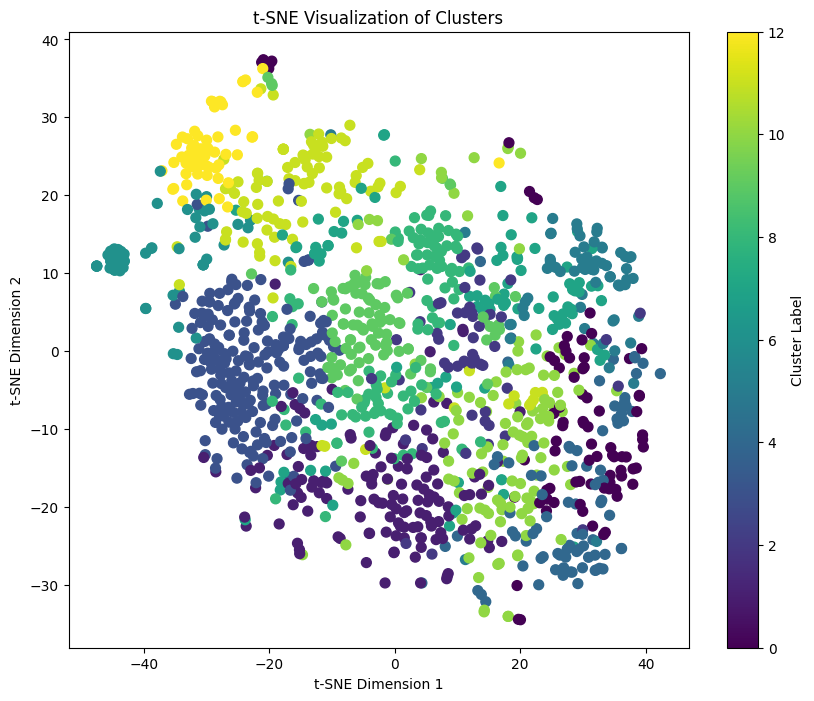

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings_numpy)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

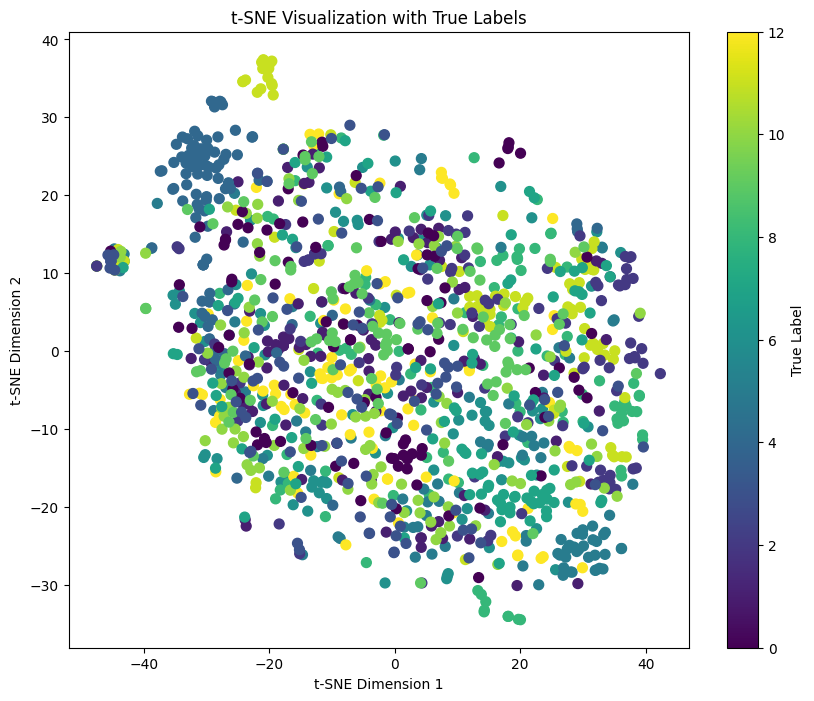

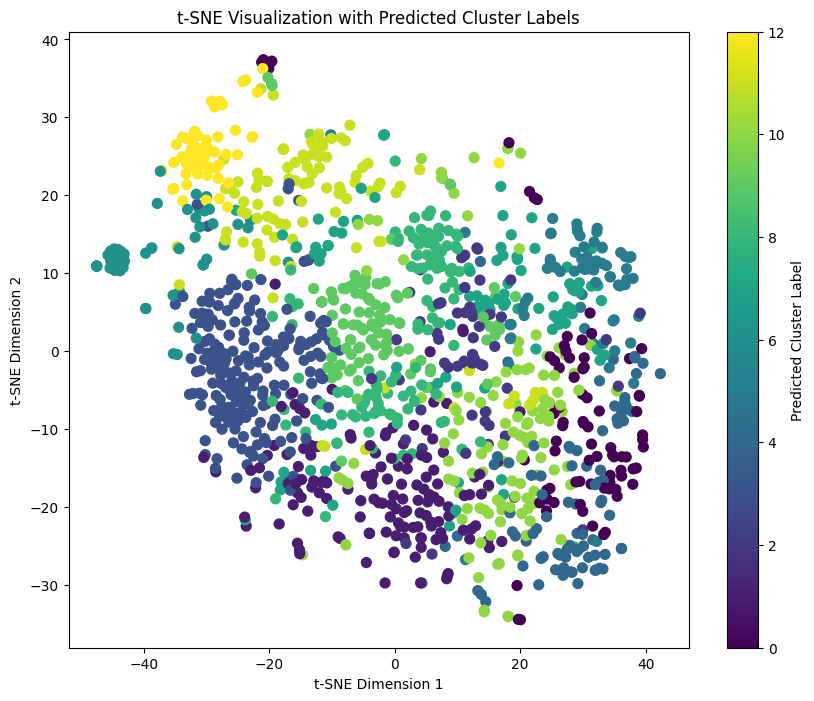

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


with open("/Users/arjuns/Downloads/notebooks_v2/content/labels.json", "r") as f:
    true_labels = json.load(f)
    
true_labels = label_encoder.fit_transform(true_labels)
# Assuming `true_labels` contains the actual labels corresponding to the embeddings
# If your true labels are in the same order as your embeddings, use them here
# If `labels` are the actual topics, make sure they match the order of embeddings

# Visualizing t-SNE results with true labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=true_labels, cmap='viridis', s=50)
plt.colorbar(label='True Label')
plt.title("t-SNE Visualization with True Labels")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

# Visualizing t-SNE results with predicted cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Predicted Cluster Label')
plt.title("t-SNE Visualization with Predicted Cluster Labels")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [21]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(embeddings_numpy, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.043


In [22]:
import pandas as pd

# Create a DataFrame for easier analysis
df = pd.DataFrame({
    'True Label': true_labels,
    'Cluster Label': labels
})

# Count the distribution of true labels within each cluster
cluster_distribution = pd.crosstab(df['Cluster Label'], df['True Label'])
print(cluster_distribution)


True Label     0   1   2   3   4   5   6   7   8   9   10  11  12
Cluster Label                                                    
0               5   4  12   2   0   5   2  13  14   0   8  15   2
1              15  13   4  16   0  15  22   9   8   3  23   2  13
2               4   7   4   6   0   4   4   5   5   8   3   2   2
3              19  29   9  19  20   9  19  12   7  18  20   2  21
4               1   2  11   2   0  30   4   6  15   3   1   3   9
5               1   2  18   0   3   5   2   6   3   7   1  17   1
6               7   0   2   7  14   5   5   4   1   4   3   8   0
7               1   1  16   9   2   3   8   8  16   6   3  20   3
8              14  15  12  14   1   5  11   5   2  10  14   2  13
9               7  11   3   8   1   1   3   1  10  25   3  13  16
10             11   6   6   7   0  14  14  21  13   7  10   5  13
11             14  10   3  10   8   4   6  10   6   9  10   6   7
12              1   0   0   0  51   0   0   0   0   0   1   5   0
